In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model
import csv, pydot, graphviz
print('Pandas version: ', pd.__version__)
print('Numpy version: ', np.__version__)

Pandas version:  1.4.3
Numpy version:  1.23.1


In [2]:
data=pd.read_csv('../dataset/TPE_model_features.csv')
data = data.loc[data['鄉鎮市區'] == '中山區']
data.insert(80, 'y', data['單價元平方公尺'])
data.drop(['單價元平方公尺'],axis=1,inplace=True)
data.head()

,Unnamed: 0.1,Unnamed: 0,鄉鎮市區,交易年份,屋齡,交易標的,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位類別,...,NEAR_LRT_250,NEAR_LRT_500,NEAR_LRT_750,NEAR_MRT_250,NEAR_MRT_500,NEAR_MRT_750,NEAR_TRA_250,NEAR_TRA_500,NEAR_TRA_750,y
14,14,14,中山區,107,2.0,1,2,1,1,1,...,0,0,0,0,1,1,0,0,0,272085
15,15,15,中山區,107,2.0,1,2,1,1,1,...,0,0,0,0,1,1,0,0,0,269428
16,16,16,中山區,107,2.0,1,2,1,1,1,...,0,0,0,0,1,1,0,0,0,270392
17,17,17,中山區,107,45.0,0,2,1,2,0,...,0,0,0,0,1,1,0,0,0,277729
39,39,39,中山區,108,27.0,0,2,2,1,0,...,0,0,0,1,1,1,0,0,0,213367


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6180 entries, 14 to 42870
Data columns (total 80 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          6180 non-null   int64  
 1   Unnamed: 0            6180 non-null   int64  
 2   鄉鎮市區                  6180 non-null   object 
 3   交易年份                  6180 non-null   int64  
 4   屋齡                    6180 non-null   float64
 5   交易標的                  6180 non-null   int64  
 6   建物現況格局-房              6180 non-null   int64  
 7   建物現況格局-廳              6180 non-null   int64  
 8   建物現況格局-衛              6180 non-null   int64  
 9   車位類別                  6180 non-null   int64  
 10  電梯                    6180 non-null   int64  
 11  floor                 6180 non-null   int64  
 12  geometry              6180 non-null   object 
 13  NEAR_HOSTIPAL_250     6180 non-null   int64  
 14  NEAR_HOSTIPAL_500     6180 non-null   int64  
 15  NEAR_HOSTIPAL_750  

In [4]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.drop(['Unnamed: 0.1'],axis=1,inplace=True)
data.drop(['鄉鎮市區'],axis=1,inplace=True)
data.drop(['geometry'],axis=1,inplace=True)
#data = data[['交易年份','屋齡','交易標的','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','車位類別','電梯','floor','NEAR_HOSTIPAL_500','CLINIC_COUNT_500','DENTIST_COUNT_500','PHARMACY_COUNT_500','CSTORE_COUNT_500','FASTFOOD_COUNT_500','LIBRARY_COUNT_500','NEAR_UNIVERSITY_500','NEAR_FIRESTATION_500','NEAR_FUEL_500','NEAR_MARKET_500','NEAR_POLICE_500','TEMPLE_COUNT_500','CEMETERY_AREA_500','WATER_AREA_500','PARKING_AREA_500','STOP_COUNT_500','NEAR_MRT_500','y']]
data.dtypes

交易年份              int64
屋齡              float64
交易標的              int64
建物現況格局-房          int64
建物現況格局-廳          int64
                 ...   
NEAR_MRT_750      int64
NEAR_TRA_250      int64
NEAR_TRA_500      int64
NEAR_TRA_750      int64
y                 int64
Length: 76, dtype: object

In [5]:
# 刪除標準差為0的欄位
#data.drop(['NEAR_SCHOOL_500'],axis=1,inplace=True)
#data.drop(['NEAR_SCHOOL_250'],axis=1,inplace=True)
data.drop(['NEAR_SCHOOL_750'],axis=1,inplace=True)
#data.drop(['NEAR_MARKET_250'],axis=1,inplace=True)
#data.drop(['NEAR_MARKET_500'],axis=1,inplace=True)
#data.drop(['NEAR_MARKET_750'],axis=1,inplace=True)
data.drop(['NEAR_LRT_250'],axis=1,inplace=True)
data.drop(['NEAR_LRT_500'],axis=1,inplace=True)
data.drop(['NEAR_LRT_750'],axis=1,inplace=True)
data.drop(['NEAR_TRA_250'],axis=1,inplace=True)
#data.drop(['NEAR_TRA_500'],axis=1,inplace=True)
#data.drop(['NEAR_TRA_750'],axis=1,inplace=True)
#data.drop(['CEMETERY_AREA_250'],axis=1,inplace=True)
#data.drop(['CEMETERY_AREA_500'],axis=1,inplace=True)
#data.drop(['CEMETERY_AREA_750'],axis=1,inplace=True)
#data.drop(['NEAR_POLICE_250'],axis=1,inplace=True)
#data.drop(['NEAR_POLICE_500'],axis=1,inplace=True)
#data.drop(['NEAR_POLICE_750'],axis=1,inplace=True)

In [6]:
data = data.sample(frac=1.0)
data = data.reset_index()
train_data = data.sample(frac=0.8)
train_data

,index,交易年份,屋齡,交易標的,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位類別,電梯,floor,...,PARKING_AREA_750,STOP_COUNT_250,STOP_COUNT_500,STOP_COUNT_750,NEAR_MRT_250,NEAR_MRT_500,NEAR_MRT_750,NEAR_TRA_500,NEAR_TRA_750,y
5649,15351,111,28.0,0,2,2,2,0,1,11,...,76147.050437,4.0,51.0,102.0,0,1,1,0,0,220679
1928,30564,108,42.0,0,1,1,1,0,0,2,...,90937.965581,7.0,66.0,116.0,0,1,1,0,0,147735
253,20714,110,38.0,0,4,2,2,0,1,4,...,93803.791738,8.0,65.0,113.0,0,1,1,0,0,206649
5935,11688,108,4.0,1,0,0,0,2,1,3,...,59796.397389,9.0,56.0,90.0,0,1,1,0,0,235616
5546,26432,109,39.0,0,2,1,1,0,0,9,...,59274.066804,8.0,59.0,101.0,0,1,1,0,0,187500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,1010,108,38.0,0,1,2,1,0,1,6,...,52860.591177,10.0,58.0,95.0,0,1,1,0,0,189400
618,35476,107,50.0,0,3,2,1,0,0,4,...,66802.126559,5.0,26.0,35.0,1,1,1,0,0,182267
1023,32726,110,13.0,0,1,1,1,0,1,4,...,80010.035073,10.0,61.0,116.0,0,1,1,0,0,205663
4791,42535,109,36.0,0,3,2,2,0,1,7,...,69848.827182,4.0,60.0,84.0,0,1,1,0,0,173129


In [7]:
data2 = data[~data.index.isin(train_data.index)]

In [8]:
val_data = data2.sample(frac=0.5)
test_data = data2[~data2.index.isin(val_data.index)]

In [9]:
train_data.drop(['index'],axis=1,inplace=True)
val_data.drop(['index'],axis=1,inplace=True)
test_data.drop(['index'],axis=1,inplace=True)

C:\Users\globe\AppData\Local\Temp\ipykernel_25816\2386914992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(['index'],axis=1,inplace=True)


In [10]:
# 做到這邊要檢視資料!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
train_validation_data = pd.concat([train_data, val_data])
mean = train_validation_data.mean()
std = train_validation_data.std()
train_data = (train_data-mean)/std
val_data = (val_data -mean)/std
#print(mean)
mean_df = pd.DataFrame(mean)
mean_df.to_csv('mean.csv')
std_df = pd.DataFrame(std)
std_df.to_csv('std.csv')

In [11]:
X_data = np.array(train_data[train_data.columns[0:72]])
y_data = np.array(train_data[train_data.columns[-1]]).reshape(len(train_data),1)
X_val = np.array(val_data[val_data.columns[0:72]])
y_val = np.array(val_data[val_data.columns[-1]]).reshape(len(val_data),1)

print(X_data.shape,type(X_data))
print(y_data.shape,type(y_data))

(4944, 71) <class 'numpy.ndarray'>
(4944, 1) <class 'numpy.ndarray'>


In [12]:
model = tf.keras.Sequential()
model.add(keras.layers.Dense(71, activation='relu', input_shape=(71,))) 
model.add(keras.layers.Dense(24, activation='relu'))
model.add(keras.layers.Dense(1)) 

In [13]:
model.compile(keras.optimizers.Adam(0.0001),
loss=keras.losses.MeanSquaredError(),
metrics=[keras.metrics.MeanAbsoluteError()])

In [14]:
model_mckp=keras.callbacks.ModelCheckpoint('TPE_chunshan_model-1.h5',
monitor='val_mean_absolute_error',
save_best_only=True,
mode='min')

In [15]:
model_cbk=keras.callbacks.TensorBoard()
history = model.fit(X_data, y_data,
batch_size=20,  
epochs=200, 
validation_data=(X_val, y_val),  
callbacks=[model_cbk, model_mckp])

Epoch 1/200
248/248 [==============================] - 1s 1ms/step - loss: 0.7049 - mean_absolute_error: 0.5784 - val_loss: 0.5561 - val_mean_absolute_error: 0.5403
Epoch 2/200
248/248 [==============================] - 0s 849us/step - loss: 0.4155 - mean_absolute_error: 0.4413 - val_loss: 0.3462 - val_mean_absolute_error: 0.4316
Epoch 3/200
248/248 [==============================] - 0s 843us/step - loss: 0.2847 - mean_absolute_error: 0.3623 - val_loss: 0.2331 - val_mean_absolute_error: 0.3551
Epoch 4/200
248/248 [==============================] - 0s 848us/step - loss: 0.2089 - mean_absolute_error: 0.3085 - val_loss: 0.1722 - val_mean_absolute_error: 0.3054
Epoch 5/200
248/248 [==============================] - 0s 839us/step - loss: 0.1591 - mean_absolute_error: 0.2693 - val_loss: 0.1324 - val_mean_absolute_error: 0.2680
Epoch 6/200
248/248 [==============================] - 0s 847us/step - loss: 0.1239 - mean_absolute_error: 0.2395 - val_loss: 0.1052 - val_mean_absolute_error: 0.2385


Epoch 50/200
248/248 [==============================] - 0s 944us/step - loss: 0.0033 - mean_absolute_error: 0.0434 - val_loss: 0.0096 - val_mean_absolute_error: 0.0676
Epoch 51/200
248/248 [==============================] - 0s 868us/step - loss: 0.0032 - mean_absolute_error: 0.0432 - val_loss: 0.0104 - val_mean_absolute_error: 0.0726
Epoch 52/200
248/248 [==============================] - 0s 831us/step - loss: 0.0030 - mean_absolute_error: 0.0416 - val_loss: 0.0095 - val_mean_absolute_error: 0.0679
Epoch 53/200
248/248 [==============================] - 0s 880us/step - loss: 0.0029 - mean_absolute_error: 0.0412 - val_loss: 0.0095 - val_mean_absolute_error: 0.0666
Epoch 54/200
248/248 [==============================] - 0s 872us/step - loss: 0.0028 - mean_absolute_error: 0.0405 - val_loss: 0.0093 - val_mean_absolute_error: 0.0656
Epoch 55/200
248/248 [==============================] - 0s 876us/step - loss: 0.0028 - mean_absolute_error: 0.0399 - val_loss: 0.0100 - val_mean_absolute_error:

Epoch 99/200
248/248 [==============================] - 0s 855us/step - loss: 9.9841e-04 - mean_absolute_error: 0.0239 - val_loss: 0.0058 - val_mean_absolute_error: 0.0488
Epoch 100/200
248/248 [==============================] - 0s 795us/step - loss: 9.2090e-04 - mean_absolute_error: 0.0233 - val_loss: 0.0058 - val_mean_absolute_error: 0.0492
Epoch 101/200
248/248 [==============================] - 0s 811us/step - loss: 0.0010 - mean_absolute_error: 0.0239 - val_loss: 0.0058 - val_mean_absolute_error: 0.0495
Epoch 102/200
248/248 [==============================] - 0s 847us/step - loss: 9.1972e-04 - mean_absolute_error: 0.0233 - val_loss: 0.0057 - val_mean_absolute_error: 0.0489
Epoch 103/200
248/248 [==============================] - 0s 807us/step - loss: 8.9290e-04 - mean_absolute_error: 0.0229 - val_loss: 0.0058 - val_mean_absolute_error: 0.0498
Epoch 104/200
248/248 [==============================] - 0s 855us/step - loss: 8.9256e-04 - mean_absolute_error: 0.0229 - val_loss: 0.0056 -

248/248 [==============================] - 0s 819us/step - loss: 5.2720e-04 - mean_absolute_error: 0.0175 - val_loss: 0.0048 - val_mean_absolute_error: 0.0439
Epoch 147/200
248/248 [==============================] - 0s 791us/step - loss: 5.6494e-04 - mean_absolute_error: 0.0178 - val_loss: 0.0048 - val_mean_absolute_error: 0.0434
Epoch 148/200
248/248 [==============================] - 0s 817us/step - loss: 5.7865e-04 - mean_absolute_error: 0.0179 - val_loss: 0.0047 - val_mean_absolute_error: 0.0440
Epoch 149/200
248/248 [==============================] - 0s 866us/step - loss: 5.3934e-04 - mean_absolute_error: 0.0175 - val_loss: 0.0046 - val_mean_absolute_error: 0.0420
Epoch 150/200
248/248 [==============================] - 0s 791us/step - loss: 5.8751e-04 - mean_absolute_error: 0.0177 - val_loss: 0.0049 - val_mean_absolute_error: 0.0431
Epoch 151/200
248/248 [==============================] - 0s 783us/step - loss: 5.7334e-04 - mean_absolute_error: 0.0176 - val_loss: 0.0050 - val_mean

248/248 [==============================] - 0s 848us/step - loss: 3.4892e-04 - mean_absolute_error: 0.0142 - val_loss: 0.0041 - val_mean_absolute_error: 0.0385
Epoch 194/200
248/248 [==============================] - 0s 799us/step - loss: 3.8731e-04 - mean_absolute_error: 0.0144 - val_loss: 0.0040 - val_mean_absolute_error: 0.0387
Epoch 195/200
248/248 [==============================] - 0s 843us/step - loss: 3.6837e-04 - mean_absolute_error: 0.0143 - val_loss: 0.0039 - val_mean_absolute_error: 0.0382
Epoch 196/200
248/248 [==============================] - 0s 783us/step - loss: 3.6192e-04 - mean_absolute_error: 0.0141 - val_loss: 0.0042 - val_mean_absolute_error: 0.0403
Epoch 197/200
248/248 [==============================] - 0s 787us/step - loss: 3.5559e-04 - mean_absolute_error: 0.0142 - val_loss: 0.0040 - val_mean_absolute_error: 0.0398
Epoch 198/200
248/248 [==============================] - 0s 775us/step - loss: 4.6091e-04 - mean_absolute_error: 0.0151 - val_loss: 0.0042 - val_mean

In [16]:
import matplotlib.pyplot as plt

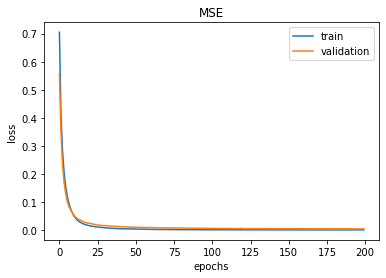

In [17]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('MSE')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='best')

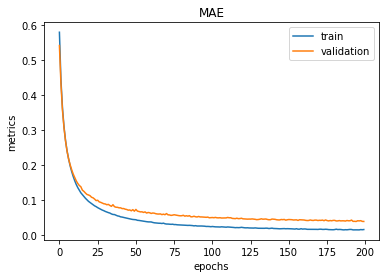

In [18]:
plt.plot(history.history['mean_absolute_error'], label='train')
plt.plot(history.history['val_mean_absolute_error'], label='validation')
plt.title('MAE')
plt.ylabel('metrics')
plt.xlabel('epochs')
plt.legend(loc='best')

In [19]:
model = keras.models.load_model('TPE_chunshan_model-1.h5')
y_test = np.array(test_data[test_data.columns[-1]]).reshape(len(test_data),1)
test_data = (test_data - mean) / std
x_test = np.array(test_data[test_data.columns[0:71]])
y_pred = model.predict(x_test)
y_pred = np.reshape(y_pred * std['y'] + mean['y'], y_test.shape)
percentage_error = np.mean(np.abs(y_test - y_pred)) / np.mean(y_test) * 100
print("Model Percentage Error: {:.2f}%".format(percentage_error))

20/20 [==============================] - 0s 577us/step
Model Percentage Error: 1.12%


In [20]:
print(type(y_test))
print(type(y_pred))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [21]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)
result = pd.concat([y_test, y_pred],axis=1)
result.to_csv('chunshan_result.csv')

In [22]:
model.layers[0].get_config()

{'name': 'dense',
 'trainable': True,
 'batch_input_shape': (None, 71),
 'dtype': 'float32',
 'units': 71,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [23]:
model.layers[0].get_weights()

[array([[ 0.00169609,  0.03935273, -0.00506666, ...,  0.00105041,
          0.0975977 , -0.03673672],
        [ 0.0803429 ,  0.02651479, -0.0726561 , ...,  0.09167983,
          0.14844167,  0.05990288],
        [-0.17183428,  0.10599736,  0.1241878 , ..., -0.19803709,
          0.11943751, -0.20427999],
        ...,
        [ 0.0656601 ,  0.15591154, -0.0767049 , ...,  0.02029638,
         -0.12029193,  0.05556519],
        [-0.1004637 , -0.01955147,  0.01991833, ..., -0.02355637,
         -0.19400808,  0.19492026],
        [ 0.01374026, -0.33218604, -0.12663123, ...,  0.2888409 ,
         -0.32409924, -0.05684177]], dtype=float32),
 array([-0.06039154,  0.05899278,  0.05554615,  0.03245989,  0.04827945,
         0.02950617,  0.01563845,  0.10269429,  0.04925264,  0.05146066,
        -0.04010656,  0.00246933,  0.07307746,  0.03661643, -0.01289416,
         0.00772204, -0.07385443,  0.0562335 ,  0.04761763, -0.01775333,
         0.04476596,  0.06389747, -0.01455112, -0.05303794,  0.050

In [24]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 71)                5112      
                                                                 
 dense_1 (Dense)             (None, 24)                1728      
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 6,865
Trainable params: 6,865
Non-trainable params: 0
_________________________________________________________________
None
